In [1]:
import numpy as np
import pandas as pd
import random

import string

from matplotlib import pyplot as plt 

df = pd.read_csv('data/compass/compas-scores.csv')
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,patrick hamilton,patrick,hamilton,2013-09-22,Male,1968-05-02,47,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-09-22,Risk of Recidivism,3,Low,2013-09-22
11753,11754,raymond hernandez,raymond,hernandez,2013-05-17,Male,1993-06-24,22,Less than 25,Caucasian,...,NaN,NaN,Risk of Violence,5,Medium,2013-05-17,Risk of Recidivism,7,Medium,2013-05-17
11754,11755,dieuseul pierre-gilles,dieuseul,pierre-gilles,2014-10-08,Male,1981-01-24,35,25 - 45,Other,...,NaN,NaN,Risk of Violence,3,Low,2014-10-08,Risk of Recidivism,4,Low,2014-10-08
11755,11756,scott lomagistro,scott,lomagistro,2013-12-03,Male,1986-12-04,29,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2013-12-03,Risk of Recidivism,3,Low,2013-12-03


In [2]:
def swap_vals(dirty_df, n):
    mods = pd.DataFrame()
    for i in range(n):
        col_i = random.randint(0,dirty_df.shape[1]-1)
        col = dirty_df.columns[col_i]
        row_1 = random.randint(0,dirty_df.shape[0]-1)
        row_2 = random.randint(0,dirty_df.shape[0]-1)
        # val = dirty_df.iloc[row][col]
        val_1 = dirty_df.iat[row_1,col_i]
        val_2 = dirty_df.iat[row_2,col_i]
    
        dirty_df.iat[row_1,col_i] = val_2
        dirty_df.iat[row_2,col_i] = val_1
    
        mod = {'col': col, 'row 1': row_1, 'val 1': val_1,'row 2': row_2,'val 2':val_2}
        # mods = mods.append(mod, ignore_index = True)
        mods = pd.concat([mods, pd.DataFrame([mod])], ignore_index=True)
    return(dirty_df,mods)

def rand_mod(dirty_df, n):
    mods = pd.DataFrame()
    for i in range(n):
        col_i = random.randint(0,dirty_df.shape[1]-1)
        col = dirty_df.columns[col_i]
        row_1 = random.randint(0,dirty_df.shape[0]-1)
        row_2 = random.randint(0,dirty_df.shape[0]-1)
        # val = dirty_df.iloc[row][col]
        val_1 = dirty_df.iat[row_1,col_i]
        val_2 = dirty_df.iat[row_2,col_i]
    
        dirty_df.iat[row_1,col_i] = val_2
        dirty_df.iat[row_2,col_i] = val_1
    
        mod = {'col': col, 'row 1': row_1, 'val 1': val_1,'row 2': row_2,'val 2':val_2}
        # mods = mods.append(mod, ignore_index = True)
        mods = pd.concat([mods, pd.DataFrame([mod])], ignore_index=True)

    return(dirty_df,mods)

In [3]:
df["compas_screening_date"] = df["compas_screening_date"].astype("datetime64[ns]")
df["c_jail_in"] = df["c_jail_in"].astype("datetime64[ns]")
df["c_jail_out"] = df["c_jail_out"].astype("datetime64[ns]")
df["c_offense_date"] = df["c_offense_date"].astype("datetime64[ns]")
df["r_offense_date"] = df["r_offense_date"].astype("datetime64[ns]")
df["c_arrest_date"] = df["c_arrest_date"].astype("datetime64[ns]")
df["vr_offense_date"] = df["vr_offense_date"].astype("datetime64[ns]")
df["v_screening_date"] = df["v_screening_date"].astype("datetime64[ns]")
df.dtypes

id                                  int64
name                               object
first                              object
last                               object
compas_screening_date      datetime64[ns]
sex                                object
dob                                object
age                                 int64
age_cat                            object
race                               object
juv_fel_count                       int64
decile_score                        int64
juv_misd_count                      int64
juv_other_count                     int64
priors_count                        int64
days_b_screening_arrest           float64
c_jail_in                  datetime64[ns]
c_jail_out                 datetime64[ns]
c_case_number                      object
c_offense_date             datetime64[ns]
c_arrest_date              datetime64[ns]
c_days_from_compas                float64
c_charge_degree                    object
c_charge_desc                     

In [4]:
df["compas_screening_date"] = df["compas_screening_date"].astype("datetime64[ns]")

<Axes: xlabel='compas_screening_date,compas_screening_date'>

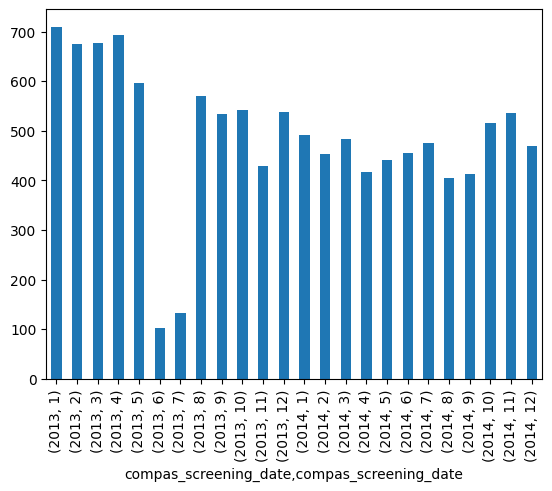

In [5]:
df["compas_screening_date"].groupby([df["compas_screening_date"].dt.year, df["compas_screening_date"].dt.month]).count().plot(kind="bar")

In [6]:
# df_1 = df['compas_screening_date'>'2013-06-01']
df_1 = df.loc[df['compas_screening_date'] <'2013-06-01']
df_2 = df.loc[df['compas_screening_date'] >='2013-06-01']
# df_1.head()

In [7]:
print(df.shape)
print(df_1.shape)
print(df_2.shape)

(11757, 47)
(3350, 47)
(8407, 47)


In [8]:
df_clean_1 = df_1
df_dirty_1 = df_1

In [9]:
# modifications = p
df_dirty_1.iloc[0]['name']

'kevon dixon'

In [10]:
df_dirty_1.dtypes['name']

dtype('O')

In [11]:
df_dirty_1,swap_mods=swap_vals(df_dirty_1, 50)
df_dirty_1,rand_mods=rand_mod(df_dirty_1, 1000)
# mods

In [12]:
df_clean_1.to_csv("data/compass/clean_1.csv", index=False)
df_dirty_1.to_csv("data/compass/dirty_1.csv", index=False)

In [13]:
tmp = pd.read_csv('data/compass/clean_1.csv')
tmp.shape

(3350, 47)

In [14]:
tmp = pd.read_csv('data/compass/dirty_1.csv')
tmp.shape

(3350, 47)